# Netflix Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Analysing the data

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


### What is the most frequent genre of movies released on Netflix?

In [6]:
arr = np.array(df['Genre'])

In [7]:
genres = pd.Series(list(genre.strip() for i in arr for genre in i.split(', '))).value_counts()

In [8]:
genres

Drama              3744
Comedy             3031
Action             2686
Thriller           2488
Adventure          1853
Romance            1476
Horror             1470
Animation          1439
Family             1414
Fantasy            1308
Science Fiction    1273
Crime              1242
Mystery             773
History             427
War                 308
Music               295
Documentary         215
TV Movie            214
Western             137
Name: count, dtype: int64

In [9]:
print("The most frequent genre of movies released on Netflix is", genres.idxmax())

The most frequent genre of movies released on Netflix is Drama


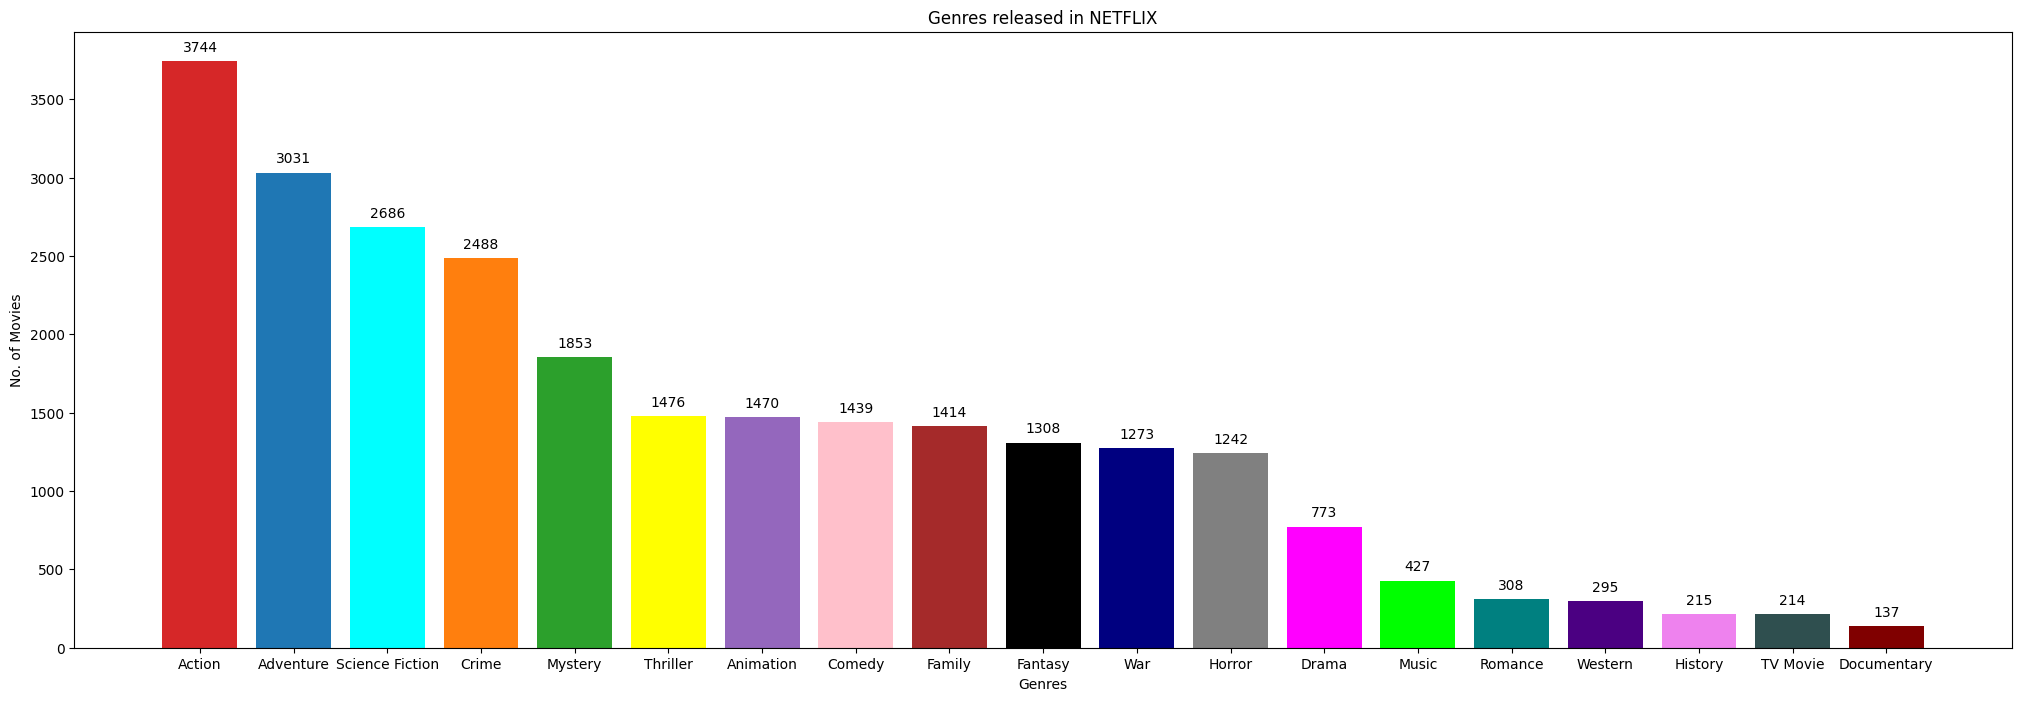

In [10]:
fig, ax = plt.subplots(figsize=(25, 8))

genre = pd.Series(list(j.strip() for i in arr for j in i.split(', '))).unique()
counts = list(genres)

bar_labels = ['red', 'blue', 'cyan', 'orange', 'green', 'yellow', 'purple', 'pink', 'brown', 'black', 'white', 'gray', 'magenta', 'lime', 'teal', 'indigo', 'violet', 'beige', 'maroon']
bar_colors = ['tab:red', 'tab:blue', 'cyan', 'tab:orange', 'tab:green', 'yellow', 'tab:purple', 'pink', 'brown', 'black', 'navy', 'gray', 'magenta', 'lime', 'teal', 'indigo', 'violet', 'darkslategray', 'maroon']

bars = ax.bar(genre, counts, label=bar_labels, color=bar_colors)
ax.bar_label(bars, labels=counts, padding=5)

ax.set_xlabel('Genres')
ax.set_ylabel('No. of Movies')
ax.set_title('Genres released in NETFLIX')

plt.show()

### Which has highest votes in vote avg column?

In [11]:
avg_votes = pd.Series(df['Vote_Average'])

In [12]:
avg_votes

0       8.3
1       8.1
2       6.3
3       7.7
4       7.0
       ... 
9822    7.6
9823    3.5
9824    5.0
9825    6.7
9826    7.8
Name: Vote_Average, Length: 9827, dtype: float64

In [13]:
max_vote = []
for i in df.itertuples():
    if i.Vote_Average == avg_votes.max():
        max_vote.append(i)

In [14]:
pd.DataFrame(max_vote)

,Index,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,9391,2020-04-09,Kung Fu Master Huo Yuanjia,The young and vigorous Huo Yuanjia was only fo...,13.745,1,10.0,zh,"Action, Drama",https://image.tmdb.org/t/p/original/boXAHksMko...


### What movie got the highest popularity? what's its genre?

In [15]:
popularity = pd.Series(df['Popularity'])

In [16]:
popularity

0       5083.954
1       3827.658
2       2618.087
3       2402.201
4       1895.511
          ...   
9822      13.357
9823      13.356
9824      13.355
9825      13.354
9826      13.354
Name: Popularity, Length: 9827, dtype: float64

In [17]:
max_pop = []
for i in df.itertuples():
    if i.Popularity == popularity.max():
        max_pop.append(i)

In [18]:
pd.DataFrame(max_pop)

,Index,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...


### What movie got the lowest popularity? what's its genre?

In [19]:
min_pop = []
for i in df.itertuples():
    if i.Popularity == popularity.min():
        min_pop.append(i)

In [20]:
pd.DataFrame(min_pop)

,Index,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
1,9826,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,"War, Drama, Science Fiction",https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


### Which year has the most filmmed movies?

In [21]:
R_date = np.array(df['Release_Date'])

In [22]:
year = pd.Series(list(i[:4] for i in R_date)).value_counts()

In [23]:
year

2021    714
2018    530
2017    510
2019    500
2016    470
       ... 
1925      1
1902      1
1920      1
1929      1
1930      1
Name: count, Length: 102, dtype: int64

In [24]:
print(f"{year.idxmax()} has the most filmmed movies.")

2021 has the most filmmed movies.


In [25]:
bins = list(range(1902, 2025, 26)) + [2025]
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins) - 1)]

year_groups = pd.cut(pd.Series(list(int(i[:4]) for i in R_date)), bins=bins, labels=labels, right=False)
grouped_counts = year_groups.value_counts().sort_index()
print(grouped_counts)

1902-1927      11
1928-1953     115
1954-1979     544
1980-2005    2751
2006-2024    6406
Name: count, dtype: int64


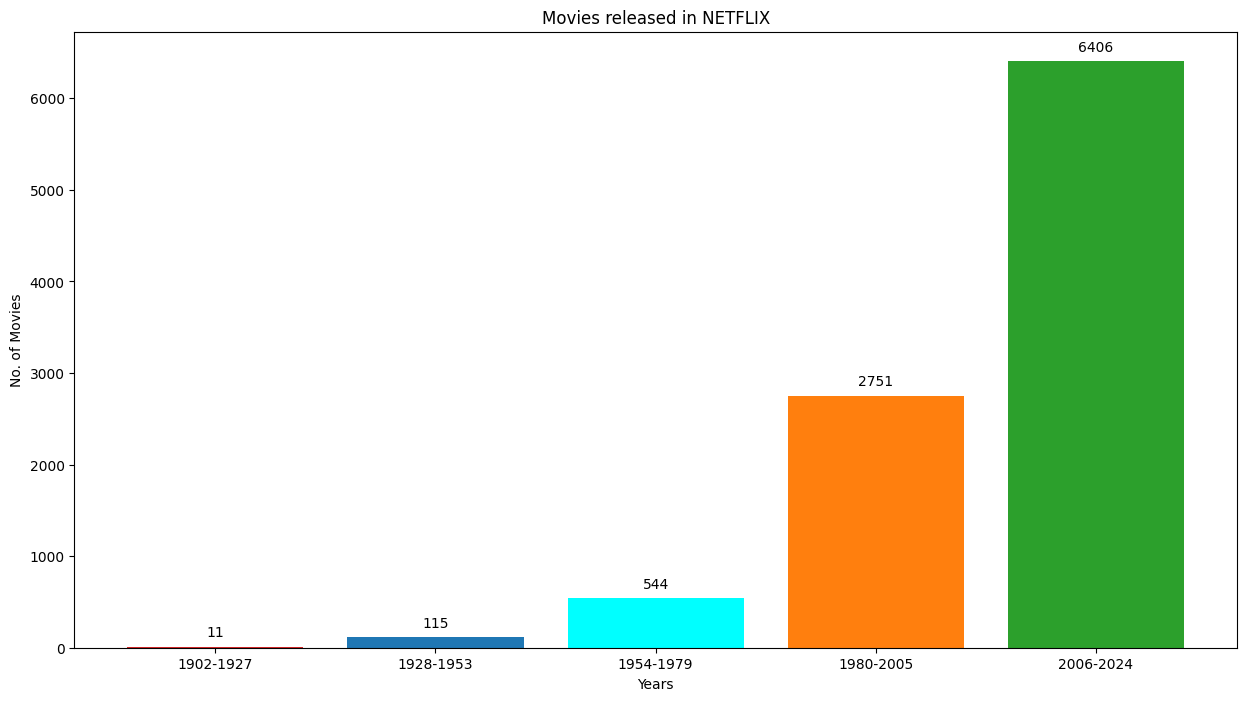

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))

year_range = grouped_counts.index.tolist()
movie_count = grouped_counts

bar_labels = ['red', 'blue', 'cyan', 'orange', 'green']
bar_colors = ['tab:red', 'tab:blue', 'cyan', 'tab:orange', 'tab:green']

bars = ax.bar(year_range, movie_count, label=bar_labels, color=bar_colors)
ax.bar_label(bars, labels=movie_count, padding=5)

ax.set_xlabel('Years')
ax.set_ylabel('No. of Movies')
ax.set_title('Movies released in NETFLIX')

plt.show()